# Detect AI vs. Human-Generated Images

## Exploratory data analysis
- https://www.kaggle.com/competitions/detect-ai-vs-human-generated-images/overview

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

sys.path.append('..')
import utils

### Carregando os dados

In [5]:
train_df = utils.load_training_data()
test_df = utils.load_test_data()

* As amostras do treino estão pareadas em duplas. Vou criar um id único para a dupla, para não haver vazamento de dados no futuro.

### Looking the data

In [6]:
print(f"test_df.shape: {test_df.shape}")
test_df.head()

test_df.shape: (5540, 3)


id  \
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg   
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg   
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg   
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg   
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg   

                                 img_id  \
0  1a2d9fd3e21b4266aea1f66b30aed157.jpg   
1  ab5df8f441fe4fbf9dc9c6baae699dc7.jpg   
2  eb364dd2dfe34feda0e52466b7ce7956.jpg   
3  f76c2580e9644d85a741a42c6f6b39c0.jpg   
4  a16495c578b7494683805484ca27cf9f.jpg   

                                            img_path  
0  ../../data/test/images/1a2d9fd3e21b4266aea1f66...  
1  ../../data/test/images/ab5df8f441fe4fbf9dc9c6b...  
2  ../../data/test/images/eb364dd2dfe34feda0e5246...  
3  ../../data/test/images/f76c2580e9644d85a741a42...  
4  ../../data/test/images/a16495c578b749468380548...

In [7]:
print(f"train_df.shape: {train_df.shape}")
train_df.head(10)

train_df.shape: (79950, 4)


label                                img_id  \
id                                                
0       1  a6dcb93f596a43249135678dfcfc17ea.jpg   
1       0  041be3153810433ab146bc97d5af505c.jpg   
2       1  615df26ce9494e5db2f70e57ce7a3a4f.jpg   
3       0  8542fe161d9147be8e835e50c0de39cd.jpg   
4       1  5d81fa12bc3b4cea8c94a6700a477cf2.jpg   
5       0  25ea852f30594bc5915eb929682af429.jpg   
6       1  e67085fb6d814cbabe08f978c738f3f7.jpg   
7       0  041c36d9269146cdb88e7526e3b91651.jpg   
8       1  4aea3b876247467c8d3713d4920148ab.jpg   
9       0  09708379751e44d0bc908d8652d0db3e.jpg   

                                             img_path  pair_id  
id                                                              
0   ../../data/train/images/a6dcb93f596a4324913567...        0  
1   ../../data/train/images/041be3153810433ab146bc...        0  
2   ../../data/train/images/615df26ce9494e5db2f70e...        1  
3   ../../data/train/images/8542fe161d9147be8e835e...        1  
4   ../../data/train/images/5d81fa12bc3b4cea8c94a6...        2  
5   ../../data/train/images/25ea852f30594bc5915eb9...        2  
6   ../../data/train/images/e67085fb6d814cbabe08f9...        3  
7   ../../data/train/images/041c36d9269146cdb88e75...        3  
8   ../../data/train/images/4aea3b876247467c8d3713...        4  
9   ../../data/train/images/09708379751e44d0bc908d...        4

### Vendo alguns Exemplos

In [9]:
def plot_image_pair(pair_id, df=train_df):
    pair = df[df['pair_id'] == pair_id]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    for ax, (_, row) in zip(axes, pair.iterrows()):
        img = Image.open(row['img_path'])
        ax.imshow(img)
        ax.set_title(f"{pair_id} - {utils.id2label[row['label']]} - {img.size}")
        ax.axis('off')
    plt.show()

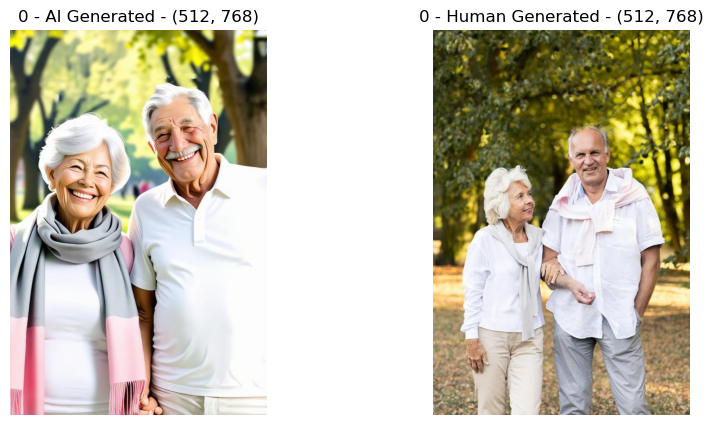

In [10]:
plot_image_pair(0)

* Vendo exemplos aleatórios

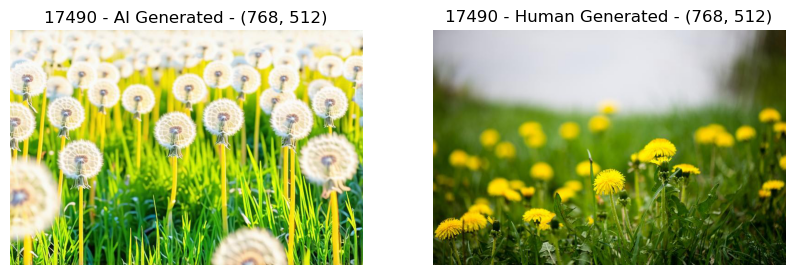

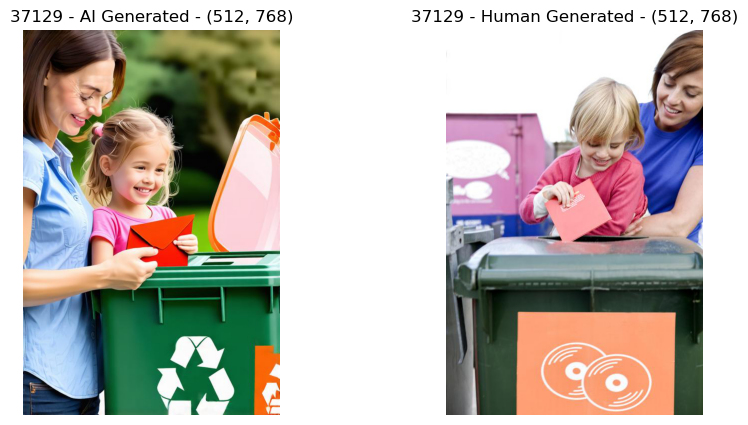

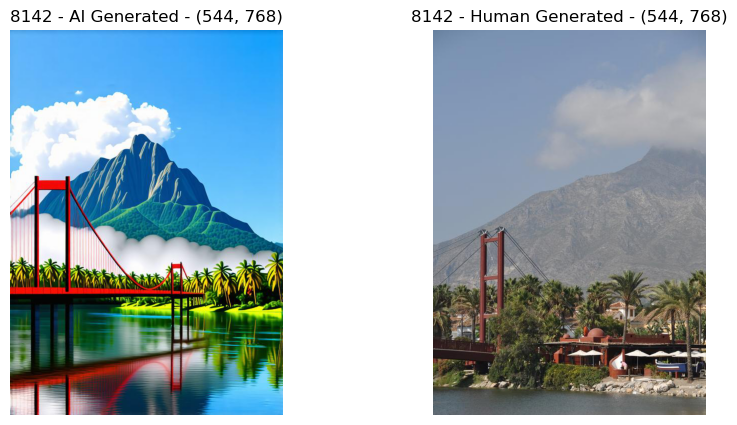

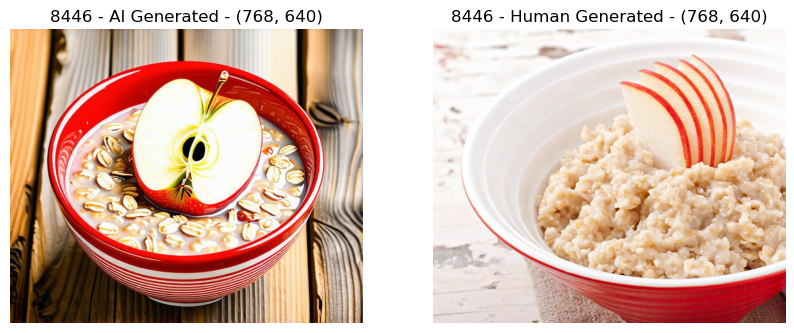

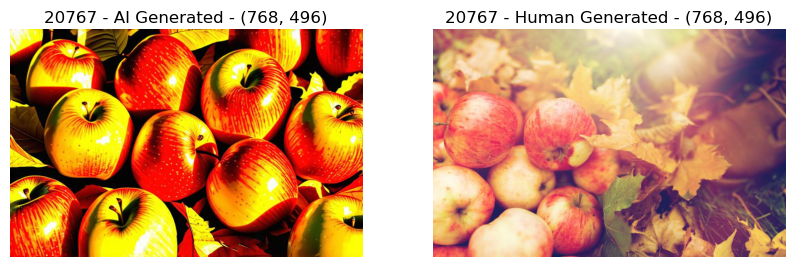

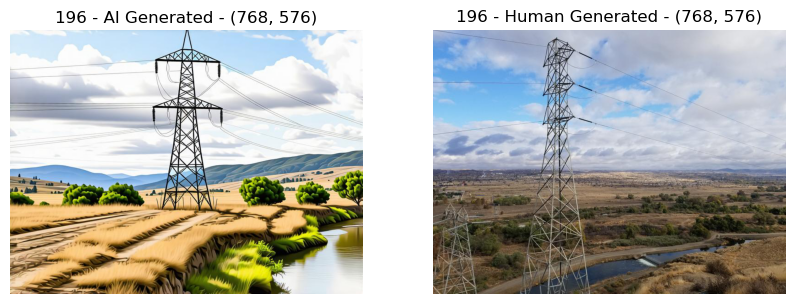

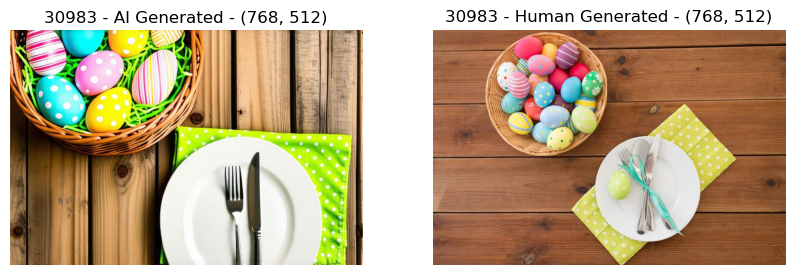

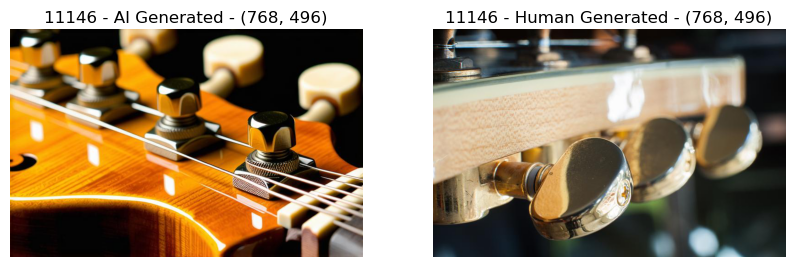

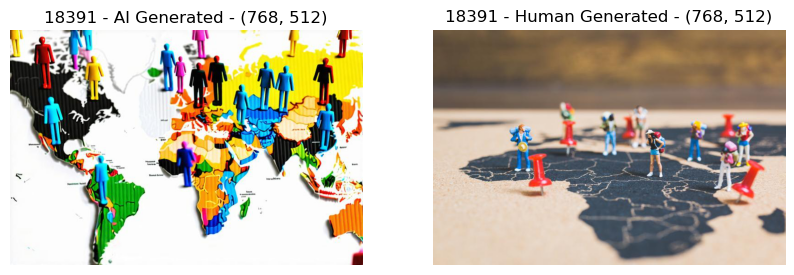

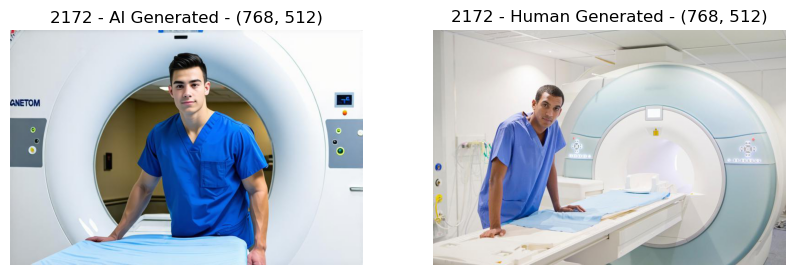

In [11]:
n = 10

random_pairs = np.random.choice(train_df['pair_id'].unique(), n, replace=False)
for pair_id in random_pairs:
    plot_image_pair(pair_id)